In [1]:
!pip install pandas numpy scikit-learn nltk matplotlib seaborn


**Step 1: Load and Inspect the Data**

First, load the dataset and check the structure.

**Load Dataset**

In [16]:
import pandas as pd

# Load the dataset
df = pd.read_csv("emails.csv")

# Display first 5 rows
print(df.head())

# Check basic information
print(df.info())

# Check summary statistics
print(df.describe(include="all"))


                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB
None
                                                     text         spam
count                                                5728  5728.000000
unique                                               5695          NaN
top     Subject: re : contact info  glenn ,  please , ...          NaN
freq                                                    

**Step 2: Check for Missing Values**

In [17]:
print(df.isnull().sum())


text    0
spam    0
dtype: int64


**Step 3: Check for Duplicates**

In [18]:
print(f"Duplicate Rows: {df.duplicated().sum()}")


Duplicate Rows: 33


In [19]:
df = df.drop_duplicates()


**Step 4: Check Class Distribution (Spam vs. Non-Spam)**

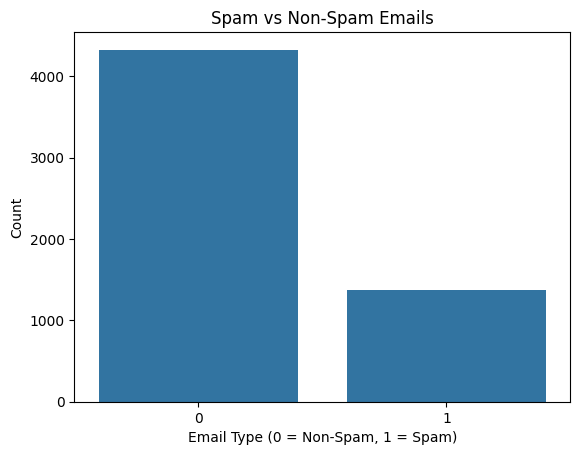


Class Distribution:
spam
0    75.978929
1    24.021071
Name: proportion, dtype: float64


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot
sns.countplot(x=df['spam'])
plt.title("Spam vs Non-Spam Emails")
plt.xlabel("Email Type (0 = Non-Spam, 1 = Spam)")
plt.ylabel("Count")
plt.show()

# Calculate percentage distribution
spam_ratio = df['spam'].value_counts(normalize=True) * 100
print(f"\nClass Distribution:\n{spam_ratio}")


**Step 5: Analyzing Email Text Length**

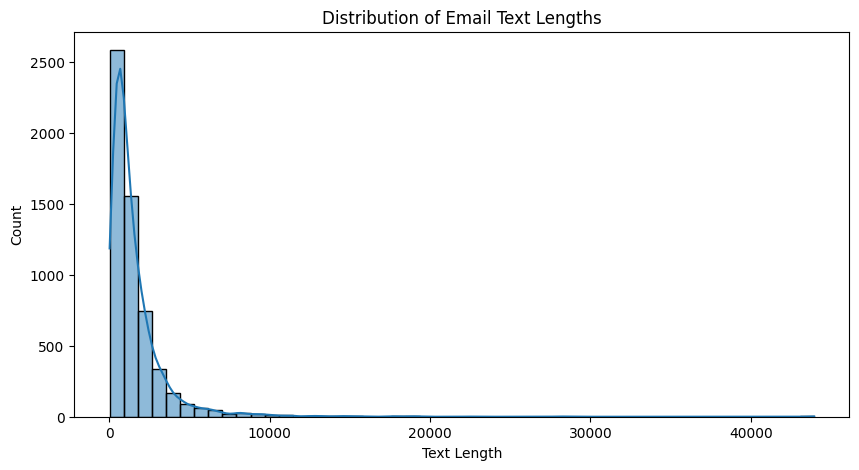

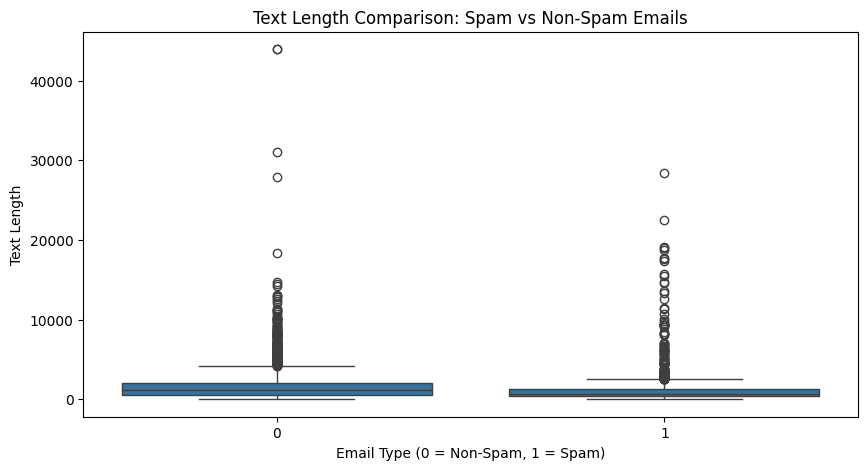

In [24]:
df["text_length"] = df["text"].apply(len)

# Plot distribution of email lengths
plt.figure(figsize=(10, 5))
sns.histplot(df["text_length"], bins=50, kde=True)
plt.title("Distribution of Email Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Count")
plt.show()

# Compare spam vs non-spam email length
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["spam"], y=df["text_length"])
plt.title("Text Length Comparison: Spam vs Non-Spam Emails")
plt.xlabel("Email Type (0 = Non-Spam, 1 = Spam)")
plt.ylabel("Text Length")
plt.show()


**Step 6: Check Most Frequent Words**

Word Frequency Analysis (Before Cleaning)

In [25]:
from collections import Counter
import re

# Join all text
all_words = " ".join(df["text"])

# Tokenize and count words
words = re.findall(r'\b\w+\b', all_words.lower())
word_counts = Counter(words)

# Display top 20 most common words
print(word_counts.most_common(20))


[('the', 49910), ('to', 41534), ('and', 27322), ('of', 23656), ('a', 19853), ('you', 19027), ('in', 17901), ('i', 17287), ('_', 17208), ('for', 16638), ('enron', 13329), ('on', 12645), ('is', 12544), ('ect', 11411), ('subject', 10119), ('this', 9993), ('that', 9247), ('your', 9243), ('be', 9202), ('with', 8810)]


**Visualizing Most Common Words**

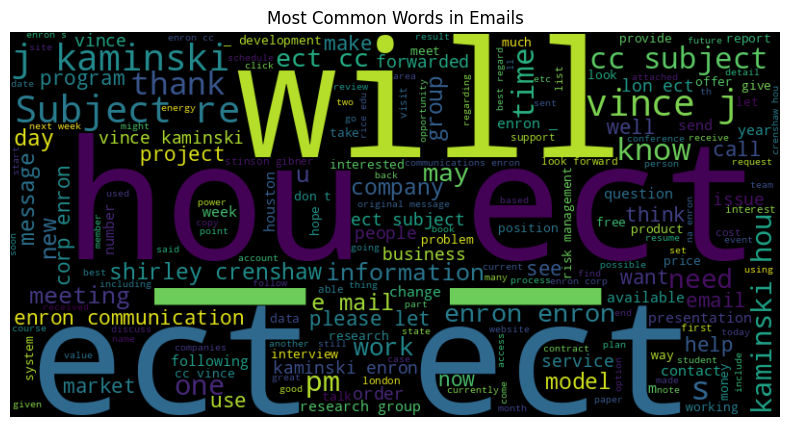

In [26]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_words)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Emails")
plt.show()


**Step 7: Check Spam vs Non-Spam Word Usage**

Most Common Words in Spam Emails

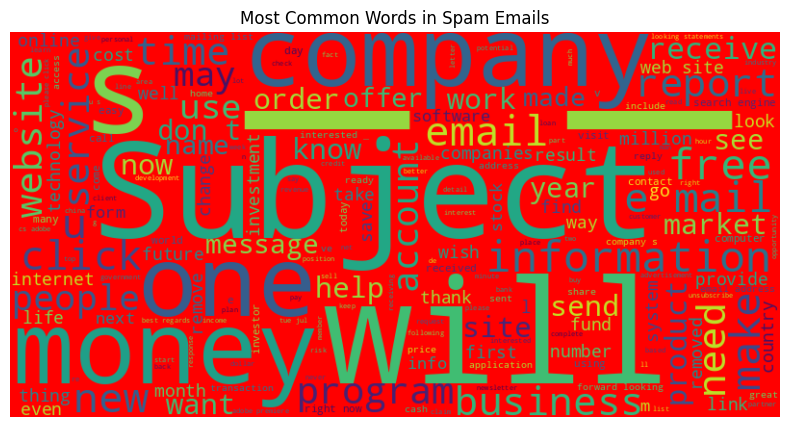

In [27]:
spam_words = " ".join(df[df["spam"] == 1]["text"])
spam_wordcloud = WordCloud(width=800, height=400, background_color="red").generate(spam_words)

plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Spam Emails")
plt.show()


**Most Common Words in Non-Spam Emails**

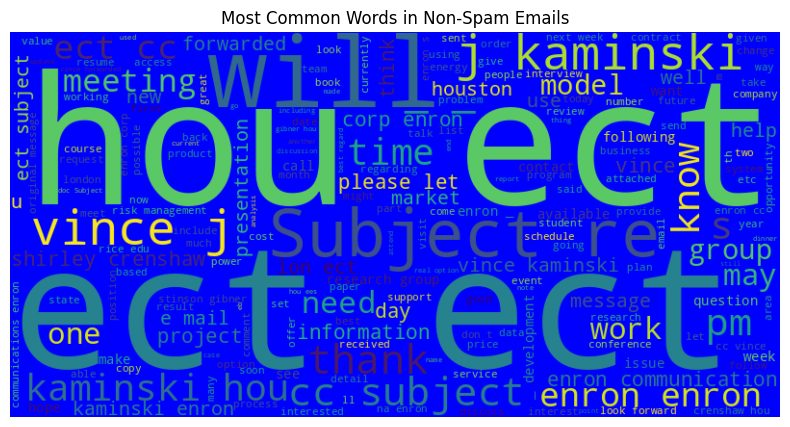

In [29]:
ham_words = " ".join(df[df["spam"] == 0]["text"])
ham_wordcloud = WordCloud(width=800, height=400, background_color="blue").generate(ham_words)

plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Non-Spam Emails")
plt.show()


**Step 8: Check the Number of Special Characters**

Spam emails often have excessive punctuation (e.g., !!!, $$$, CLICK HERE).

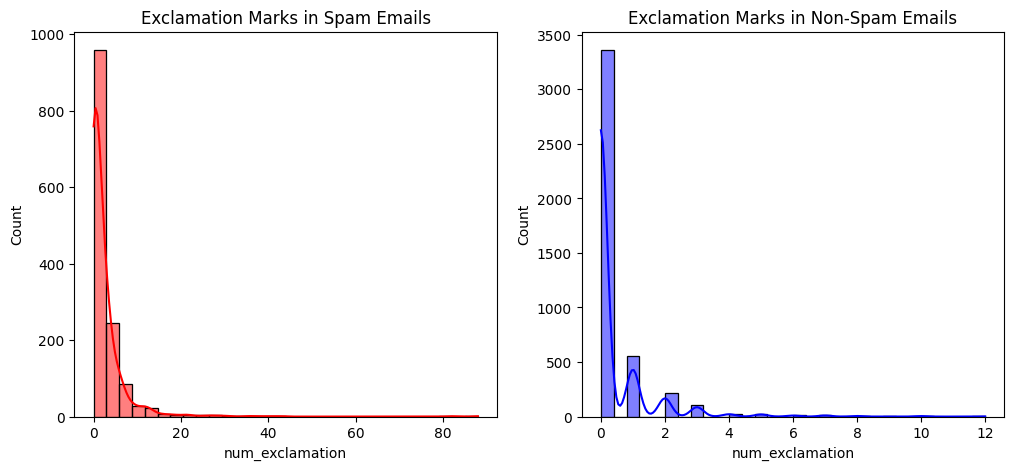

In [30]:
df["num_exclamation"] = df["text"].apply(lambda x: x.count("!"))
df["num_dollar"] = df["text"].apply(lambda x: x.count("$"))

# Plot distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df[df["spam"] == 1]["num_exclamation"], bins=30, kde=True, color="red")
plt.title("Exclamation Marks in Spam Emails")

plt.subplot(1, 2, 2)
sns.histplot(df[df["spam"] == 0]["num_exclamation"], bins=30, kde=True, color="blue")
plt.title("Exclamation Marks in Non-Spam Emails")

plt.show()


**Check Email Subject Line (If Available)**

In [32]:
# Word Cloud for Subject Line
if "subject" in df.columns:
    subject_words = " ".join(df["subject"])
    subject_wordcloud = WordCloud(width=800, height=400, background_color="black").generate(subject_words)

    plt.figure(figsize=(10, 5))
    plt.imshow(subject_wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Most Common Words in Email Subjects")
    plt.show()


**Step 10: Check TF-IDF Feature Importance (Word Contribution)**

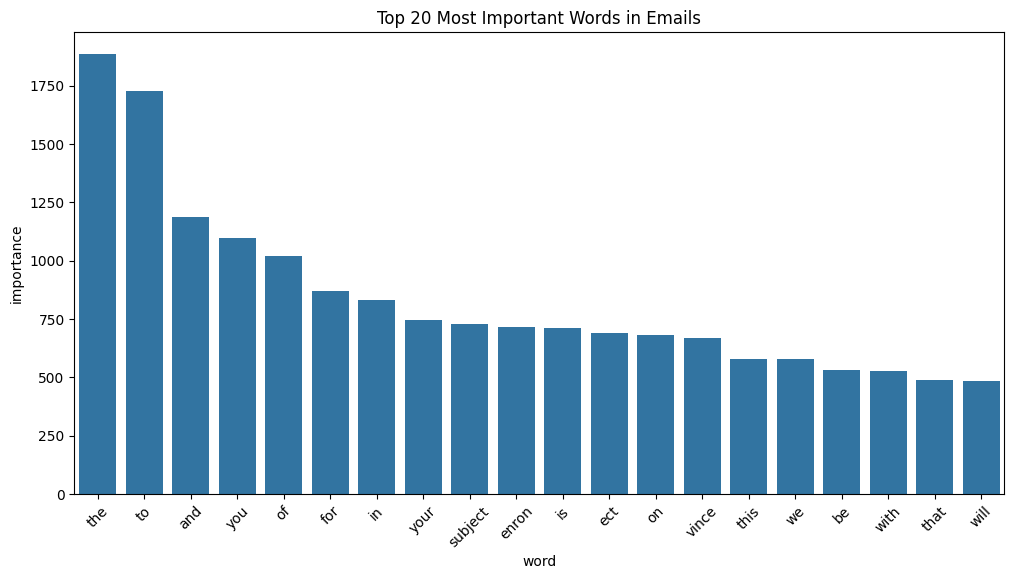

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=20)
X = vectorizer.fit_transform(df["text"]).toarray()

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Sum TF-IDF values for each feature
feature_importance = X.sum(axis=0)

# Convert to DataFrame for plotting
feature_df = pd.DataFrame({'word': feature_names, 'importance': feature_importance})
feature_df = feature_df.sort_values(by='importance', ascending=False)

# Plot top words
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_df["word"], y=feature_df["importance"])
plt.xticks(rotation=45)
plt.title("Top 20 Most Important Words in Emails")
plt.show()


**Models Implementation**

In [33]:
import pandas as pd
import numpy as np
import re
import string



from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report


**Prepare Data for Model Training**

In [34]:
# Define target variable (spam: 1, non-spam: 0)
y = df["spam"]  # Labels

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (4556, 20)
Test set size: (1139, 20)


**Train and Evaluate Models**

**Model 1: Naïve Bayes Classifier**

In [35]:
# Train Naïve Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Predict
y_pred_nb = nb_model.predict(X_test)

# Evaluate
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)

print("Naïve Bayes Performance:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Naïve Bayes Performance:
Accuracy: 0.7471
Precision: 1.0000
Recall: 0.0270

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.85       843
           1       1.00      0.03      0.05       296

    accuracy                           0.75      1139
   macro avg       0.87      0.51      0.45      1139
weighted avg       0.81      0.75      0.65      1139



**Model 2: Logistic Regression**

In [36]:
# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict
y_pred_log = log_reg.predict(X_test)

# Evaluate
accuracy_log = accuracy_score(y_test, y_pred_log)
precision_log = precision_score(y_test, y_pred_log)
recall_log = recall_score(y_test, y_pred_log)

print("\nLogistic Regression Performance:")
print(f"Accuracy: {accuracy_log:.4f}")
print(f"Precision: {precision_log:.4f}")
print(f"Recall: {recall_log:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))



Logistic Regression Performance:
Accuracy: 0.8841
Precision: 0.8060
Recall: 0.7297

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92       843
           1       0.81      0.73      0.77       296

    accuracy                           0.88      1139
   macro avg       0.86      0.83      0.84      1139
weighted avg       0.88      0.88      0.88      1139



**Model 3: Random Forest Classifier**

In [37]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

print("\nRandom Forest Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))



Random Forest Performance:
Accuracy: 0.9298
Precision: 0.8724
Recall: 0.8547

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       843
           1       0.87      0.85      0.86       296

    accuracy                           0.93      1139
   macro avg       0.91      0.91      0.91      1139
weighted avg       0.93      0.93      0.93      1139



**Compare Model Performance**


Comparison of Model Performance:
                 Model  Accuracy  Precision    Recall
0          Naïve Bayes  0.747147   1.000000  0.027027
1  Logistic Regression  0.884109   0.805970  0.729730
2        Random Forest  0.929763   0.872414  0.854730


<ipython-input-38-cdf0645b0c46>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=results, palette="coolwarm")


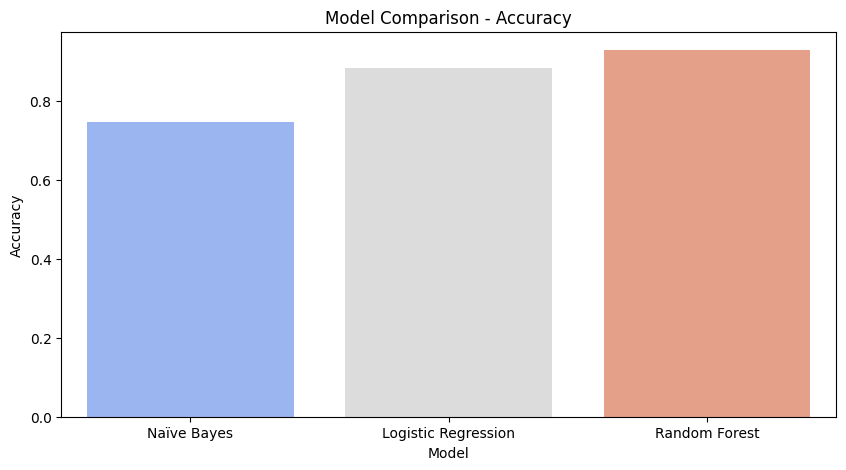

<ipython-input-38-cdf0645b0c46>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Precision", data=results, palette="coolwarm")


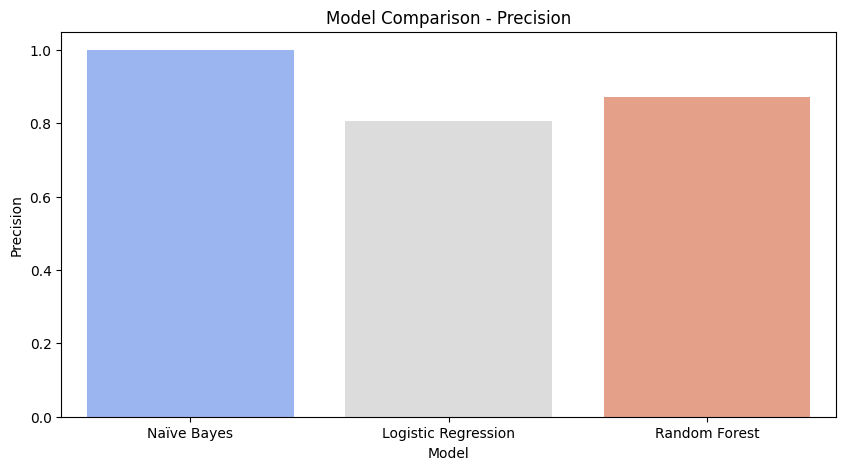

<ipython-input-38-cdf0645b0c46>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Recall", data=results, palette="coolwarm")


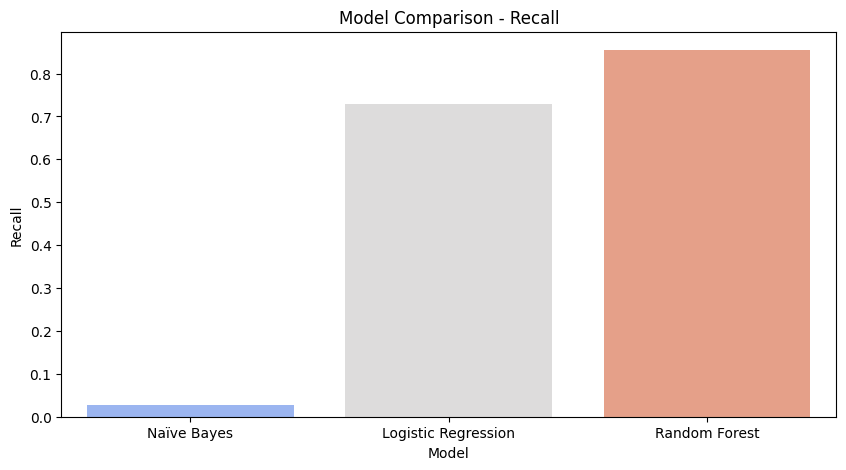

In [38]:
# Create a DataFrame for comparison
results = pd.DataFrame({
    "Model": ["Naïve Bayes", "Logistic Regression", "Random Forest"],
    "Accuracy": [accuracy_nb, accuracy_log, accuracy_rf],
    "Precision": [precision_nb, precision_log, precision_rf],
    "Recall": [recall_nb, recall_log, recall_rf]
})

# Display results
print("\nComparison of Model Performance:")
print(results)

# Plot results
plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Accuracy", data=results, palette="coolwarm")
plt.title("Model Comparison - Accuracy")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Precision", data=results, palette="coolwarm")
plt.title("Model Comparison - Precision")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x="Model", y="Recall", data=results, palette="coolwarm")
plt.title("Model Comparison - Recall")
plt.show()
